# ***Creating DataFrame***

In [2]:
print('Credit Card Fraud Detection Using Machine Learning')

Credit Card Fraud Detection Using Machine Learning


In [3]:
#Starting by installing and importing the Pandas library for data manipulation
!pip install pandas
import pandas as pd

In [4]:
#Creating a variable called 'data frame' and loading my dataset into this variable
data_frame = pd.read_csv('/content/drive/MyDrive/card_transdata.csv')

In [5]:
#displaying the first five rows of the dataset
data_frame.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [6]:
#renaming the column headers
#using inplace=True so these changes apply to the original dataset
#axis=1 because the columns are being renamed
data_frame.rename({'distance_from_home':"home_distance",'distance_from_last_transaction':"last_transaction_distance", 'ratio_to_median_purchase_price':"price_ratio",'repeat_retailer':"is_repeat",'used_chip':"card_used",'used_pin_number':"pin_used",}, axis=1, inplace=True)
data_frame.head()

,home_distance,last_transaction_distance,price_ratio,is_repeat,card_used,pin_used,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   home_distance              1000000 non-null  float64
 1   last_transaction_distance  1000000 non-null  float64
 2   price_ratio                1000000 non-null  float64
 3   is_repeat                  1000000 non-null  float64
 4   card_used                  1000000 non-null  float64
 5   pin_used                   1000000 non-null  float64
 6   online_order               1000000 non-null  float64
 7   fraud                      1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [8]:
#changing the types of the columns that represent binary data. These would be changed to integers as they should be whole numbers
data_frame = data_frame.astype({'is_repeat':'int64','card_used':'int64','pin_used':'int64','online_order':'int64','fraud':'int64'})
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   home_distance              1000000 non-null  float64
 1   last_transaction_distance  1000000 non-null  float64
 2   price_ratio                1000000 non-null  float64
 3   is_repeat                  1000000 non-null  int64  
 4   card_used                  1000000 non-null  int64  
 5   pin_used                   1000000 non-null  int64  
 6   online_order               1000000 non-null  int64  
 7   fraud                      1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


In [9]:
#to confirm the number of missing values in each column
print(data_frame.isnull().sum())


home_distance                0
last_transaction_distance    0
price_ratio                  0
is_repeat                    0
card_used                    0
pin_used                     0
online_order                 0
fraud                        0
dtype: int64


In [10]:
#using the describe function to output descriptive statistics
data_frame.describe()

,home_distance,last_transaction_distance,price_ratio,is_repeat,card_used,pin_used,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#installing and importing these libraries in order to create visualisations
!pip install matplotlib pandas numpy
import matplotlib.pyplot as plt
import numpy as np

# ***Histograms***

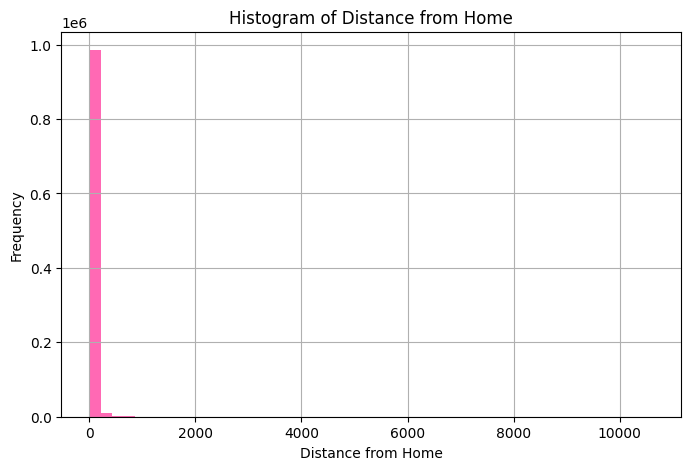

In [12]:
#creating a histogram of home_distance column
plt.figure(figsize=(8, 5)) #setting the size of the histogram
plt.hist(data_frame['home_distance'], bins=50, color='hotpink')
plt.title("Histogram of Distance from Home")
plt.xlabel("Distance from Home")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

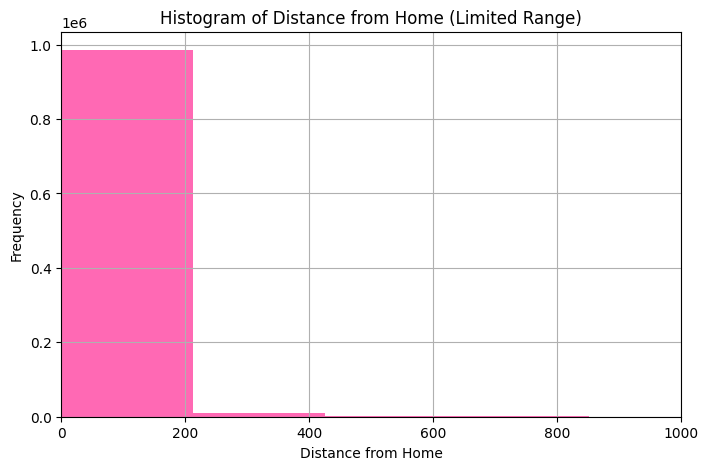

In [13]:
#limiting the range of the data to 1000 to show the positive skew in the data more effectively. (kind of zooming into it)
plt.figure(figsize=(8, 5))
plt.hist(data_frame['home_distance'], bins=50, color='hotpink')
plt.xlim([0, 1000])  # Limit x-axis to 0-100
plt.title("Histogram of Distance from Home (Limited Range)")
plt.xlabel("Distance from Home")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


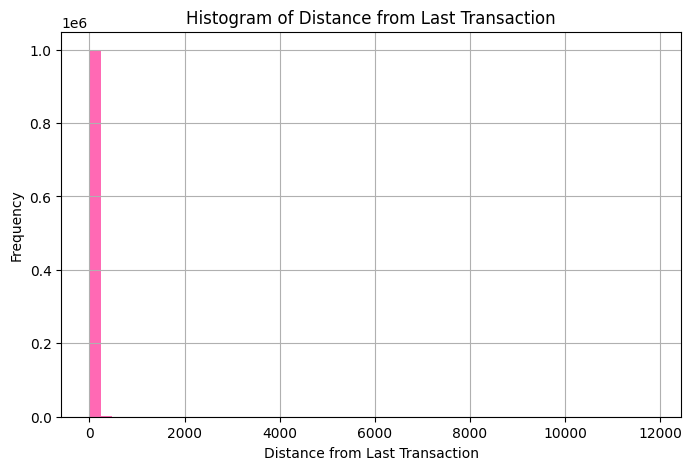

In [14]:
#creating a histogram of last_transaction_distance column
plt.figure(figsize=(8, 5))
plt.hist(data_frame['last_transaction_distance'], bins=50, color='hotpink')
plt.title("Histogram of Distance from Last Transaction")
plt.xlabel("Distance from Last Transaction")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

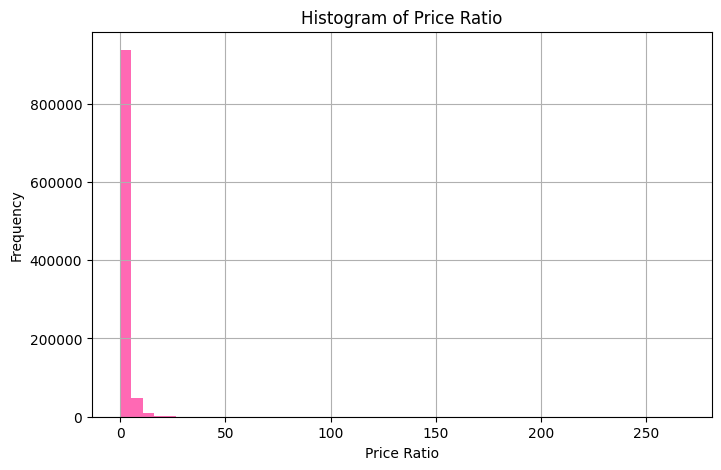

In [15]:
#creating a histogram of price_ratio column
plt.figure(figsize=(8, 5))
plt.hist(data_frame['price_ratio'], bins=50, color='hotpink')
plt.title("Histogram of Price Ratio")
plt.xlabel("Price Ratio")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# ***Boxplots***

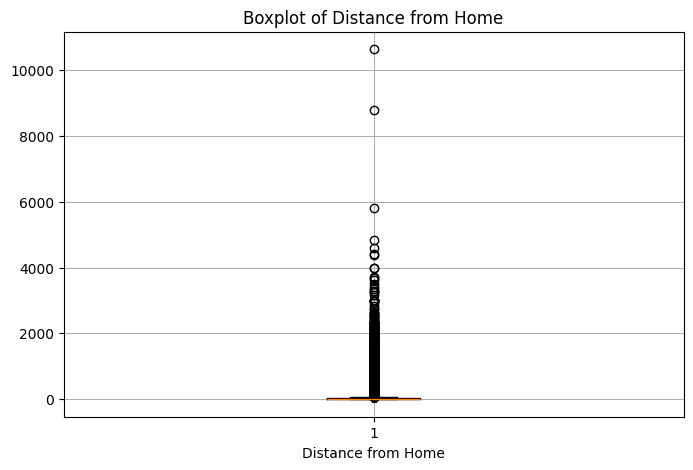

In [16]:
#creating a boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(data_frame['home_distance'])
plt.title("Boxplot of Distance from Home")
plt.xlabel("Distance from Home")
plt.grid(True)
plt.show()

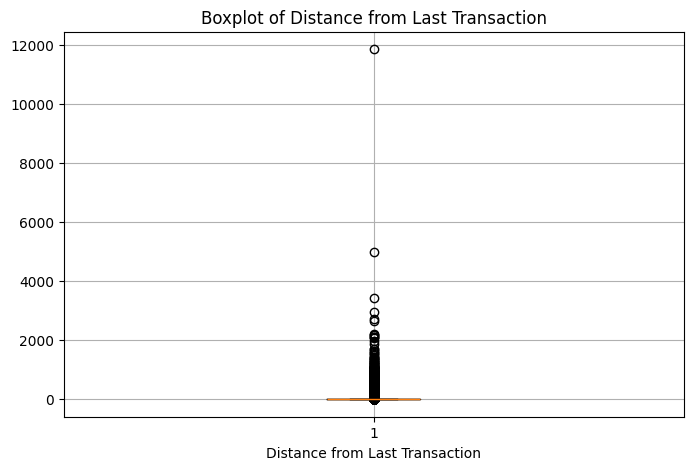

In [17]:
#creating a boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(data_frame['last_transaction_distance'])
plt.title("Boxplot of Distance from Last Transaction")
plt.xlabel("Distance from Last Transaction")
plt.grid(True)
plt.show()

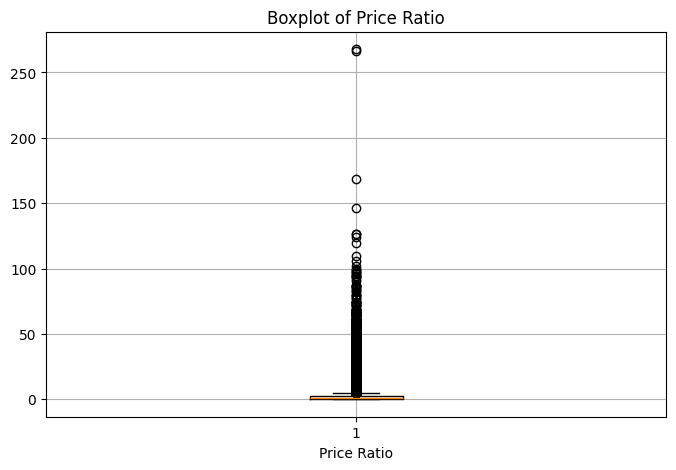

In [18]:
plt.figure(figsize=(8, 5))
plt.boxplot(data_frame['price_ratio'])
plt.title("Boxplot of Price Ratio")
plt.xlabel("Price Ratio")
plt.grid(True)
plt.show()

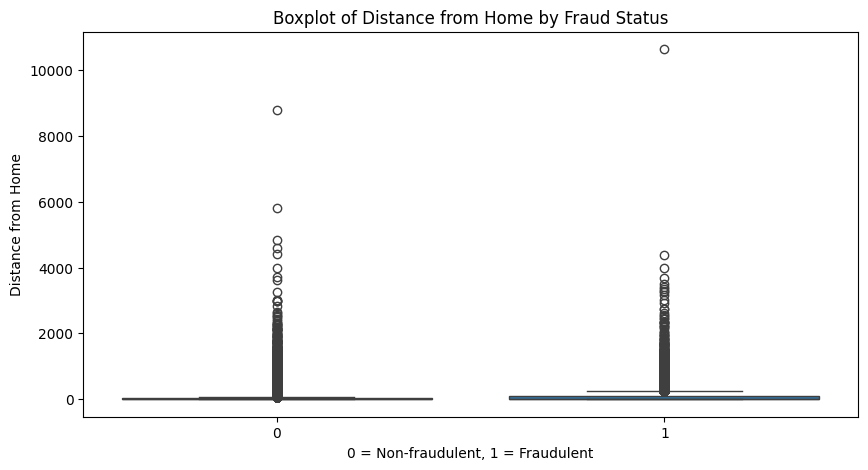

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=data_frame['fraud'], y=data_frame['home_distance'])
plt.title("Boxplot of Distance from Home by Fraud Status")
plt.xlabel("0 = Non-fraudulent, 1 = Fraudulent")
plt.ylabel("Distance from Home")
plt.show()


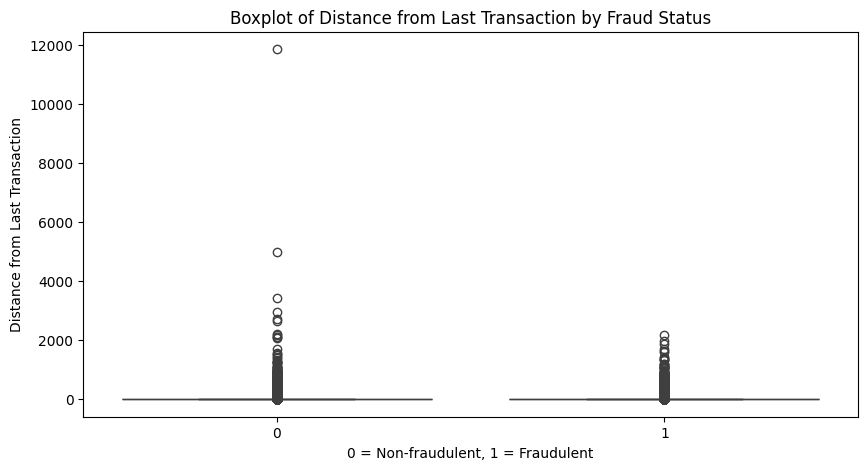

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_frame['fraud'], y=data_frame['last_transaction_distance'])
plt.title("Boxplot of Distance from Last Transaction by Fraud Status")
plt.xlabel("0 = Non-fraudulent, 1 = Fraudulent")
plt.ylabel("Distance from Last Transaction")
plt.show()

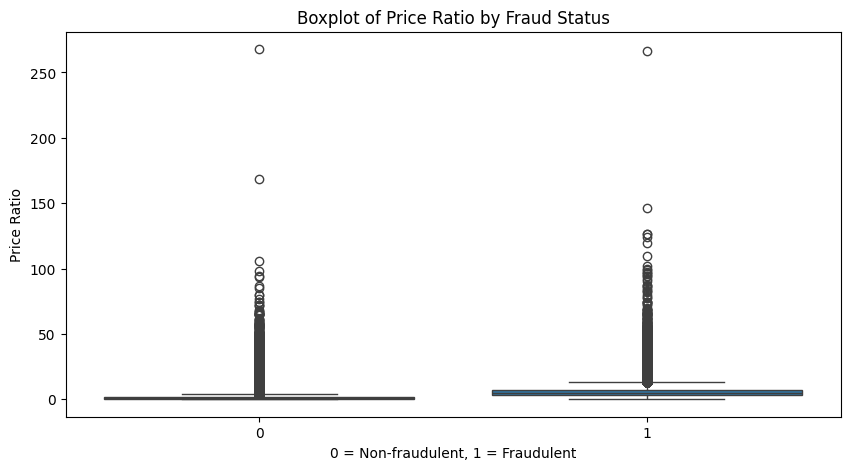

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_frame['fraud'], y=data_frame['price_ratio'])
plt.title("Boxplot of Price Ratio by Fraud Status")
plt.xlabel("0 = Non-fraudulent, 1 = Fraudulent")
plt.ylabel("Price Ratio")
plt.show()

# ***Undersampling***

In [22]:
data_frame['fraud'].value_counts()

,count
fraud,
0,912597
1,87403


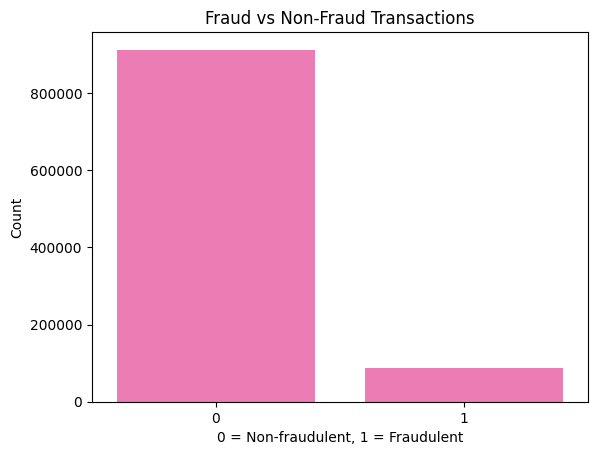

In [23]:
sns.countplot(x='fraud', data=data_frame, color='hotpink')
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("0 = Non-fraudulent, 1 = Fraudulent")
plt.ylabel("Count")
plt.show()

In [24]:
#fraud_percentage = data_frame['fraud'].sum()/len(data_frame)*100
print(f"Fraud percentage: {(data_frame['fraud'].sum()/len(data_frame)*100)}%")

Fraud percentage: 8.7403%


In [25]:
#dividing the data frame by fraud
df_fraud = data_frame[data_frame['fraud'] == 1 ]
df_nonfraud = data_frame[data_frame['fraud'] == 0 ]

In [26]:
#creating a variable for the number of fraud cases to be used in the next step when creating a sample dataset
fraud_count = data_frame['fraud'].sum()
print(fraud_count)

87403


In [27]:
#creates a sample dataset to match the no. of non-fraud cases to fraud cases.
#setting a random state to 42 so this is the same random sample each time and not different each time
nonfraud_sample = df_nonfraud.sample(n=int(fraud_count), random_state=42)

In [28]:
#concatenate the 2 dataframes to create a new dataset that has been undersampled
undersampled_df = pd.concat([df_fraud,nonfraud_sample])

In [29]:
#checking the new count of fraud and non fraud in the undersampled dataset
undersampled_df['fraud'].value_counts()

,count
fraud,
1,87403
0,87403


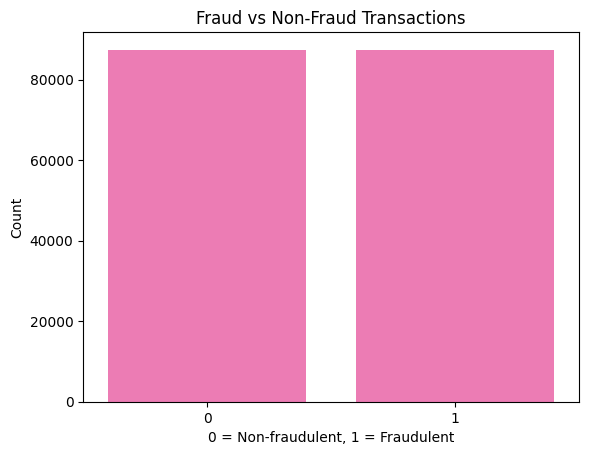

In [30]:
sns.countplot(x='fraud', data=undersampled_df, color='hotpink')
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("0 = Non-fraudulent, 1 = Fraudulent")
plt.ylabel("Count")
plt.show()

# ***Oversampling***

# ***Logistic Regression after Undersampling***

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [32]:
#splitting the data into features and target variable
#this drops the fraud column leaving us with the rest of the columns which are the 'features'
x = undersampled_df.drop(['fraud'], axis = 1)
#the target is the fraud column which is saved as (y)
y = undersampled_df['fraud']

In [33]:
#80% of dataset will be used for model training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [34]:
#features need to be scaled to avoid the error: STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


https://www.geeksforgeeks.org/logistic-regression-and-the-feature-scaling-ensemble/

website for how to scale data for logistic regression

In [35]:
#initiate and fit the model
model_lr = LogisticRegression()
model_lr.fit(x_train_scaled, y_train)

LogisticRegression()

In [36]:
#making predictions on the test set
y_predict = model_lr.predict(x_test_scaled)

# ***Evaluation metrics***

In [37]:
cf_matrix = metrics.confusion_matrix(y_test, y_predict)
cf_matrix

array([[16237,  1251],
       [  842, 16632]])

In [38]:
accuracy = metrics.accuracy_score(y_test, y_predict)
print(accuracy)

0.9401350037183227


In [39]:
print(data_frame['fraud'].value_counts())

fraud
0    912597
1     87403
Name: count, dtype: int64


In [40]:
#as seen above, the code outputs the non-fraud count first so the first target variable will be non-fraud
from sklearn.metrics import classification_report
target_names = ['Non-Fraud', 'Fraud']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

   Non-Fraud       0.95      0.93      0.94     17488
       Fraud       0.93      0.95      0.94     17474

    accuracy                           0.94     34962
   macro avg       0.94      0.94      0.94     34962
weighted avg       0.94      0.94      0.94     34962

